# US Baby Names 1880-2010

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import os
import shutil
from pathlib import Path

sys.path.append("../")

from helpers.utils import download_by_url

In [2]:
DATASET_DIR = download_by_url(
    "https://www.ssa.gov/oact/babynames/names.zip",
    "../input/us_baby_names/names.zip",
    unzip=True,
)

✅ Download complete: ../input/us_baby_names/names.zip
Unzipping ../input/us_baby_names/names.zip
✅ Unzipped to: ../input/us_baby_names


In [3]:
for root, _, f in os.walk(DATASET_DIR):
    print(f)

['NationalReadMe.pdf', 'yob1880.txt', 'yob1881.txt', 'yob1882.txt', 'yob1883.txt', 'yob1884.txt', 'yob1885.txt', 'yob1886.txt', 'yob1887.txt', 'yob1888.txt', 'yob1889.txt', 'yob1890.txt', 'yob1891.txt', 'yob1892.txt', 'yob1893.txt', 'yob1894.txt', 'yob1895.txt', 'yob1896.txt', 'yob1897.txt', 'yob1898.txt', 'yob1899.txt', 'yob1900.txt', 'yob1901.txt', 'yob1902.txt', 'yob1903.txt', 'yob1904.txt', 'yob1905.txt', 'yob1906.txt', 'yob1907.txt', 'yob1908.txt', 'yob1909.txt', 'yob1910.txt', 'yob1911.txt', 'yob1912.txt', 'yob1913.txt', 'yob1914.txt', 'yob1915.txt', 'yob1916.txt', 'yob1917.txt', 'yob1918.txt', 'yob1919.txt', 'yob1920.txt', 'yob1921.txt', 'yob1922.txt', 'yob1923.txt', 'yob1924.txt', 'yob1925.txt', 'yob1926.txt', 'yob1927.txt', 'yob1928.txt', 'yob1929.txt', 'yob1930.txt', 'yob1931.txt', 'yob1932.txt', 'yob1933.txt', 'yob1934.txt', 'yob1935.txt', 'yob1936.txt', 'yob1937.txt', 'yob1938.txt', 'yob1939.txt', 'yob1940.txt', 'yob1941.txt', 'yob1942.txt', 'yob1943.txt', 'yob1944.txt', 'y

In [4]:
names1880 = pd.read_csv(
    os.path.join(DATASET_DIR, "yob1880.txt"), names=["name", "sex", "births"]
)
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [5]:
names1880.groupby("sex")["births"].sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [6]:
pieces = []
for year in range(1880, 2011):
    path = os.path.join(DATASET_DIR, f"yob{year}.txt")
    frame = pd.read_csv(path, names=["name", "sex", "births"])
    # Add a column for the year
    frame["year"] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [7]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [8]:
total_births = names.pivot_table("births", index="year", columns="sex", aggfunc="sum")
total_births.tail()

sex,F,M
year,,
2006,1901070,2055119
2007,1922448,2075235
2008,1890718,2039947
2009,1836870,1983305
2010,1777327,1918412


<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

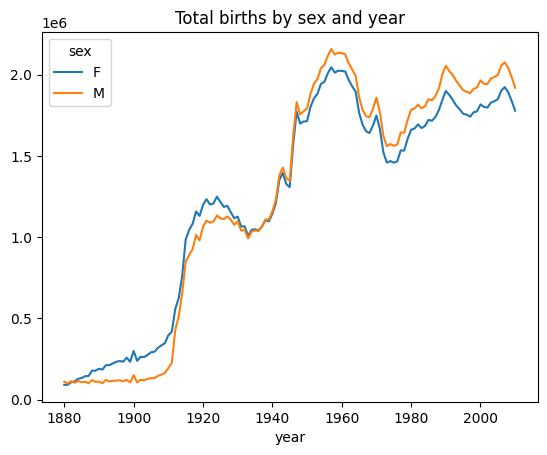

In [9]:
total_births.plot(title="Total births by sex and year")

In [10]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group


names = (
    names.groupby(["year", "sex"]).apply(add_prop, include_groups=False).reset_index()
)

In [11]:
names.head()

,year,sex,level_2,name,births,prop
0,1880,F,0,Mary,7065,0.077642
1,1880,F,1,Anna,2604,0.028617
2,1880,F,2,Emma,2003,0.022012
3,1880,F,3,Elizabeth,1939,0.021309
4,1880,F,4,Minnie,1746,0.019188


In [12]:
names.groupby(["year", "sex"])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [13]:
def get_top1000(group):
    return group.sort_values(by="births", ascending=False).head(1000)


grouped = names.groupby(["year", "sex"])
top1000 = grouped.apply(get_top1000)
top1000.head()

C:\Users\purch\AppData\Local\Temp\ipykernel_24316\1970094788.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = grouped.apply(get_top1000)


year sex  level_2       name  births      prop
year sex                                                  
1880 F   0  1880   F        0       Mary    7065  0.077642
         1  1880   F        1       Anna    2604  0.028617
         2  1880   F        2       Emma    2003  0.022012
         3  1880   F        3  Elizabeth    1939  0.021309
         4  1880   F        4     Minnie    1746  0.019188

In [14]:
top1000 = top1000.reset_index(drop=True)
top1000.head()

,year,sex,level_2,name,births,prop
0,1880,F,0,Mary,7065,0.077642
1,1880,F,1,Anna,2604,0.028617
2,1880,F,2,Emma,2003,0.022012
3,1880,F,3,Elizabeth,1939,0.021309
4,1880,F,4,Minnie,1746,0.019188


## Analyzing Naming Trends

In [15]:
boys = top1000[top1000["sex"] == "M"]
girls = top1000[top1000["sex"] == "F"]

total_births = top1000.pivot_table(
    "births", index="year", columns="name", aggfunc="sum"
)
total_births.tail()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
2006,NaN,3745.0,NaN,8309.0,NaN,NaN,298.0,NaN,404.0,440.0,...,NaN,5153.0,2858.0,531.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3960.0,NaN,8947.0,NaN,NaN,314.0,NaN,349.0,469.0,...,NaN,4937.0,3044.0,527.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,958.0,4045.0,219.0,8545.0,NaN,NaN,321.0,NaN,344.0,401.0,...,NaN,4781.0,3449.0,494.0,NaN,NaN,NaN,NaN,NaN,NaN
2009,1268.0,4378.0,270.0,7983.0,NaN,NaN,297.0,NaN,307.0,370.0,...,NaN,5152.0,3995.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN
2010,450.0,4672.0,438.0,7468.0,227.0,NaN,282.0,NaN,299.0,329.0,...,NaN,6274.0,5219.0,508.0,NaN,NaN,NaN,NaN,NaN,259.0


In [16]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1880 to 2010
Columns: 6848 entries, Aaden to Zuri
dtypes: float64(6848)
memory usage: 6.8 MB


In [17]:
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

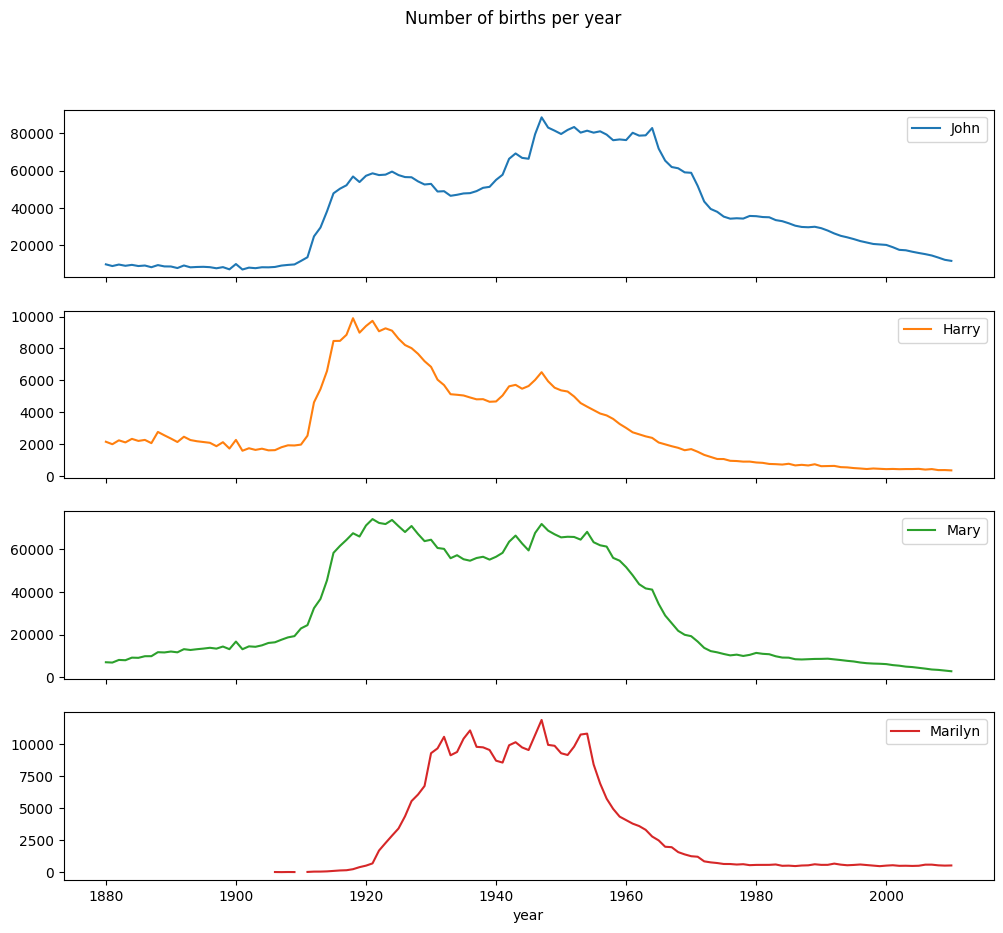

In [18]:
subset.plot(subplots=True, figsize=(12, 10), title="Number of births per year")

### Measuring the increase in naming diversity

In [19]:
table = top1000.pivot_table("prop", index="year", columns="sex", aggfunc="sum")

<Axes: title={'center': 'Sum of table1000.prop by year and sex'}, xlabel='year'>

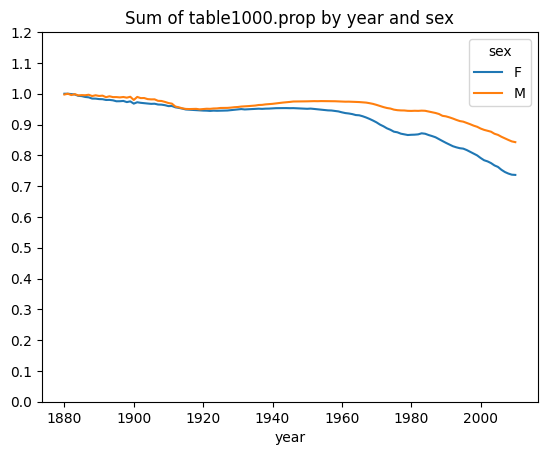

In [20]:
table.plot(
    title="Sum of table1000.prop by year and sex", yticks=np.linspace(0, 1.2, 13)
)

In [21]:
df = boys[boys["year"] == 2010]
df

,year,sex,level_2,name,births,prop
260876,2010,M,1678364,Jacob,22154,0.011548
260877,2010,M,1678365,Ethan,18017,0.009392
260878,2010,M,1678366,Michael,17381,0.009060
260879,2010,M,1678367,Jayden,17200,0.008966
260880,2010,M,1678368,William,17071,0.008899
...,...,...,...,...,...,...
261871,2010,M,1679358,Taj,197,0.000103
261872,2010,M,1679361,Destin,196,0.000102
261873,2010,M,1679365,Joziah,196,0.000102
261874,2010,M,1679366,Keshawn,196,0.000102


In [22]:
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()
prop_cumsum[:10]

260876    0.011548
260877    0.020940
260878    0.030000
260879    0.038966
260880    0.047864
260881    0.056604
260882    0.065194
260883    0.073463
260884    0.081567
260885    0.089651
Name: prop, dtype: float64

In [23]:
prop_cumsum.searchsorted(0.5)

np.int64(116)

In [24]:
df = boys[boys.year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

np.int64(25)

In [25]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()
diversity.head()

C:\Users\purch\AppData\Local\Temp\ipykernel_24316\1524694453.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)


sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

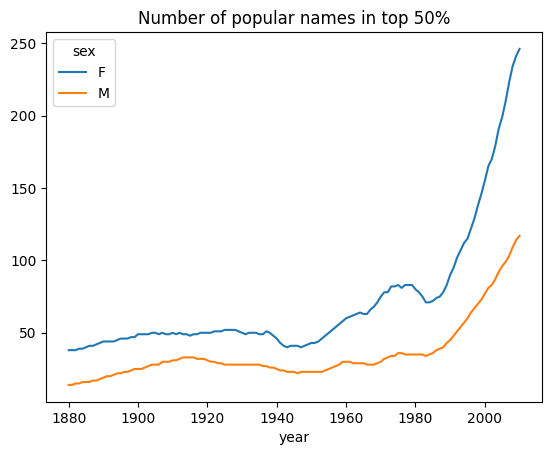

In [26]:
diversity.plot(title="Number of popular names in top 50%")

### The “last letter” revolution

In [27]:
def get_last_letter(x):
    return x[-1]

last_letters = names["name"].map(get_last_letter)

In [28]:
last_letters.name = "last_letter"
table = names.pivot_table(
    "births", index=last_letters, columns=["sex", "year"], aggfunc=sum
)
table.head()

C:\Users\purch\AppData\Local\Temp\ipykernel_24316\686817189.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = names.pivot_table(


sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41914.0  48089.0  49616.0  53883.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48941.0  59440.0  58631.0  ...   39176.0   38862.0   37878.0   
b                NaN      NaN      NaN  ...   51028.0   49344.0   48140.0   
c                NaN      NaN      NaN  ...   27135.0   27269.0   27734.0   
d             1027.0   1298.0   1374.0  ...   60941.0   55969.0   53499.0   
e            54353.0  66748.0  66662.0  ...  145560.0  144833.0  144984.0   

sex                                                                      \
year             2004      2005      2006      2007      2008      2009   
last_letter                                                               
a             38727.0   36926.0   36271.0   34780.0   33074.0   31659.0   
b             45985.0   43232.0   42715.0   42282.0   40124.0   39131.0   
c             26810.0   26133.0   26694.0   26933.0   25414.0   24180.0   
d             51890.0   50815.0   51581.0   50796.0   48121.0   46402.0   
e            142315.0  141380.0  143326.0  144126.0  141487.0  136172.0   

sex                    
year             2010  
last_letter            
a             28906.0  
b             39320.0  
c             23378.0  
d             44876.0  
e            130395.0  

[5 rows x 262 columns]

In [29]:
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691254.0  677566.0    977.0    5216.0   28906.0
b                 NaN     694.0     455.0    411.0    3913.0   39320.0
c                 5.0      49.0     958.0    482.0   15456.0   23378.0
d              6751.0    3732.0    2645.0  22111.0  262105.0   44876.0
e            133599.0  435000.0  317138.0  28665.0  178731.0  130395.0

In [30]:
subtable.sum()

sex  year
F    1910     396503.0
     1960    2021900.0
     2010    1777327.0
M    1910     194208.0
     1960    2131915.0
     2010    1918412.0
dtype: float64

In [31]:
letter_prop = subtable / subtable.sum()
letter_prop.head()

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273388  0.341883  0.381228  0.005031  0.002447  0.015068
b                 NaN  0.000343  0.000256  0.002116  0.001835  0.020496
c            0.000013  0.000024  0.000539  0.002482  0.007250  0.012186
d            0.017026  0.001846  0.001488  0.113852  0.122943  0.023392
e            0.336943  0.215144  0.178435  0.147599  0.083836  0.067970

<Axes: title={'center': 'Female'}, xlabel='last_letter'>

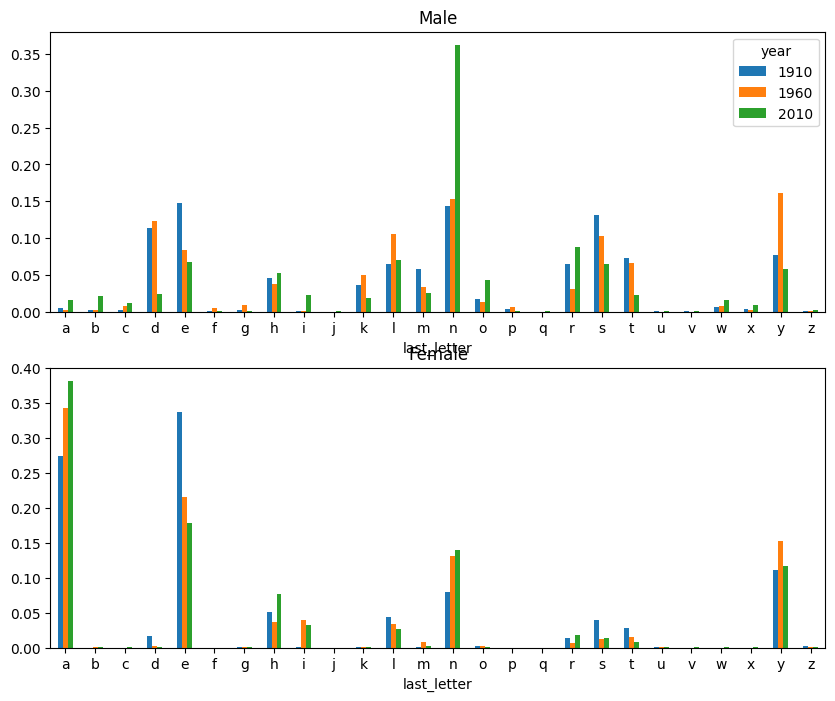

In [32]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female", legend=False)

In [33]:
letter_prop = table / table.sum()
letter_prop.head()

sex                 F                                                    \
year             1880      1881      1882      1883      1884      1885   
last_letter                                                               
a            0.345583  0.343447  0.338776  0.341254  0.338555  0.341272   
b                 NaN       NaN       NaN       NaN       NaN       NaN   
c                 NaN       NaN  0.000046  0.000045       NaN       NaN   
d            0.006693  0.006601  0.006806  0.007211  0.007100  0.006479   
e            0.366848  0.370624  0.374595  0.373163  0.372728  0.372898   

sex                                                  ...         M            \
year             1886      1887      1888      1889  ...      2001      2002   
last_letter                                          ...                       
a            0.339715  0.335256  0.332770  0.328712  ...  0.020164  0.020017   
b                 NaN       NaN       NaN       NaN  ...  0.026265  0.025416   
c                 NaN       NaN       NaN       NaN  ...  0.013967  0.014046   
d            0.006967  0.007035  0.007267  0.007703  ...  0.031367  0.028828   
e            0.372808  0.372329  0.373683  0.373737  ...  0.074922  0.074600   

sex                                                                      \
year             2003      2004      2005      2006      2007      2008   
last_letter                                                               
a            0.019176  0.019512  0.018489  0.017649  0.016760  0.016213   
b            0.024371  0.023169  0.021647  0.020785  0.020375  0.019669   
c            0.014041  0.013508  0.013085  0.012989  0.012978  0.012458   
d            0.027084  0.026144  0.025444  0.025099  0.024477  0.023589   
e            0.073400  0.071702  0.070791  0.069741  0.069450  0.069358   

sex                              
year             2009      2010  
last_letter                      
a            0.015963  0.015068  
b            0.019730  0.020496  
c            0.012192  0.012186  
d            0.023396  0.023392  
e            0.068659  0.067970  

[5 rows x 262 columns]

In [34]:
dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083238,0.153214,0.077461
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


<Axes: xlabel='year'>

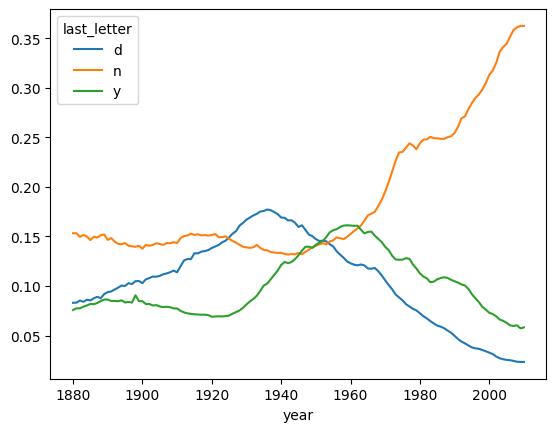

In [35]:
dny_ts.plot()

### Boy names that became girl names (and vice versa)

In [36]:
all_names = pd.Series(top1000["name"].unique())
lesley_like = all_names[all_names.str.contains("Lesl")]
lesley_like.head()

645     Leslie
2324    Lesley
4238    Leslee
4709     Lesli
6084     Lesly
dtype: object

In [37]:
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["births"].sum()

name
Leslee       994
Lesley     35029
Lesli        929
Leslie    370585
Lesly      10073
Name: births, dtype: int64

In [38]:
table = filtered.pivot_table("births", index="year", columns="sex", aggfunc="sum")
table = table.div(table.sum(axis="columns"), axis="index")
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


<Axes: xlabel='year'>

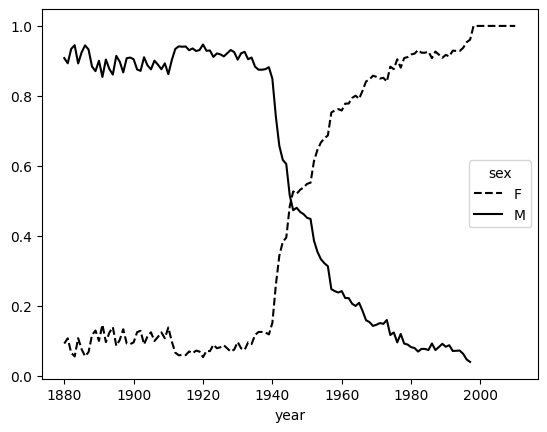

In [39]:
table.plot(style={"M": "k-", "F": "k--"})